In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
import scipy.stats as stats
import xarray as xr
import ipdb
import glob
import itertools
import numpy.ma as ma
from utils import u_statistics as u_stat
from scipy.stats import gaussian_kde, linregress
import pickle as pkl
from utils import u_plot as uplot, u_darrays as uda, u_met
import pandas as pd

##for regridding, install xesmf:
# conda install esmpy
# pip install xesmf
from utils import constants as cnst

pylab.rcParams['figure.figsize'] = (30., 30.)
#%matplotlib inline

In [2]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [6]:
era_all = pkl.load(open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA5_allmonth_5-8N_2000-2014_18UTC_front.p', 'rb'))
era_clim = pkl.load(open (cnst.CLOVER_SAVES + 'StormLoc_-50_5000km_WA_ERA5_allmonth_5-8N_2000-2014_18UTC_front_CLIM.p', 'rb'))

In [7]:
def get_col(var):
    vdic = {}
    vdic['low'] = []
    vdic['high'] = []
    vdic['mean'] = []
    for v in var:
        
        vdic['low'].append(v.flatten()[16])
        vdic['high'].append(v.flatten()[9])
        vdic['mean'].append(np.array(v).flatten().mean())        
    return vdic

In [8]:
def get_q(var):
    vdic = {}
    vdic['low'] = []
    for v in var:
        
        vdic['low'].append(np.array(v[12:16]).sum())
     
    return vdic

In [9]:
era_all['dates'][0].month

1

In [10]:
dq_s = np.array(era_all['q925_s'])*1000-np.array(era_clim['q925_s'])*1000
dq = np.array(era_all['q925'])*1000-np.array(era_clim['q925'])*1000

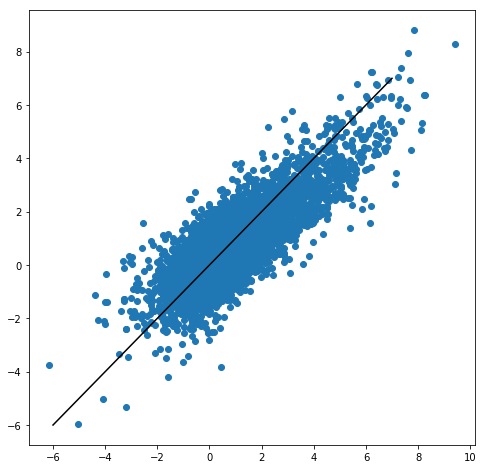

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(np.array(era_all['q925_s'])*1000-np.array(era_clim['q925_s'])*1000, np.array(era_all['q925'])*1000-np.array(era_clim['q925'])*1000)
plt.plot(np.arange(-6,8), np.arange(-6,8), 'k')

(-20, 20)

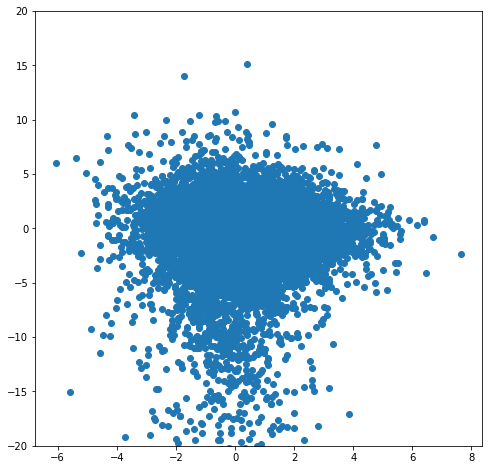

In [22]:
plt.figure(figsize=(8,8))
plt.scatter((np.array(era_all['t2'])-np.array(era_all['t2_s']))- (np.array(era_clim['t2'])-np.array(era_clim['t2_s'])),np.array(era_all['divMoist'])*10000)
plt.ylim(-20,20)
#plt.plot(np.arange(-6,8), np.arange(-6,8), 'k')

(array([1.000e+01, 1.050e+02, 6.950e+02, 3.016e+03, 6.140e+03, 3.730e+03,
        1.150e+03, 2.170e+02, 3.400e+01, 5.000e+00]),
 array([-6.06478882, -4.69274597, -3.32070313, -1.94866028, -0.57661743,
         0.79542542,  2.16746826,  3.53951111,  4.91155396,  6.2835968 ,
         7.65563965]),
 <a list of 10 Patch objects>)

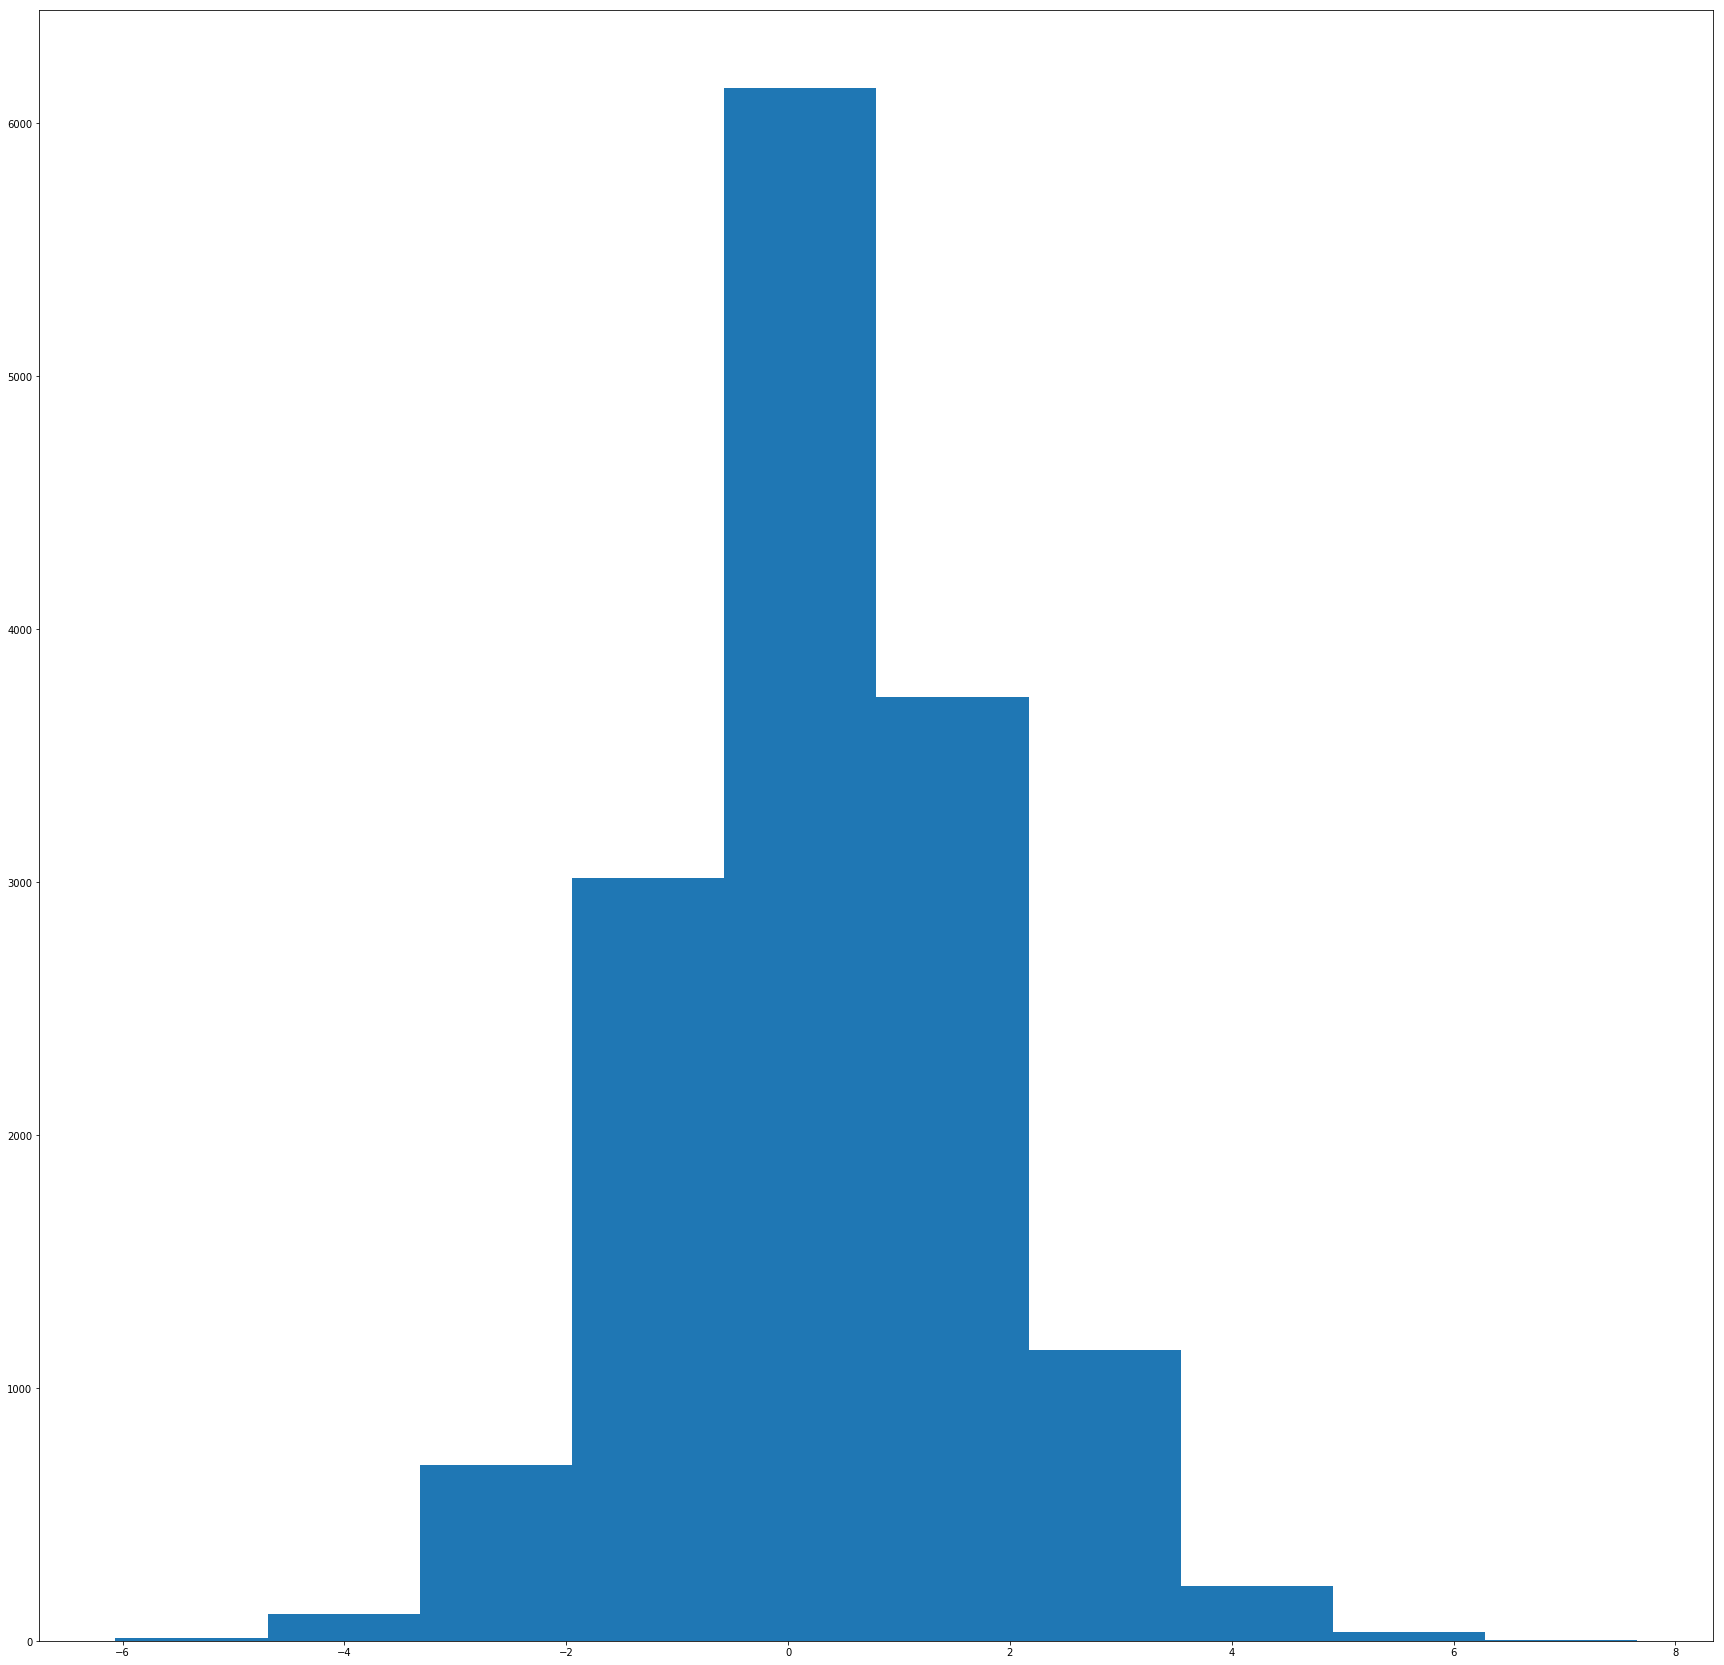

In [20]:
plt.hist((np.array(era_all['t2'])-np.array(era_all['t2_s']))- (np.array(era_clim['t2'])-np.array(era_clim['t2_s'])))

pears (-0.22502071353849146, 2.685064006644256e-215)
pears (-0.3096652416869922, 0.0)
pears (-0.18680564120317067, 7.961270294131736e-148)


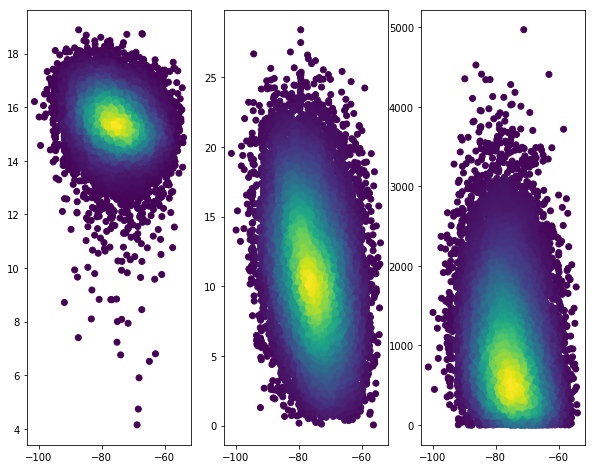

In [476]:
f=plt.figure(figsize=(10,8))
ax = f.add_subplot(131)

udic = get_col(era_all['u_col'])
vdic = get_col(era_all['v_col'])

ushear = (np.array(udic['high'])-np.array(udic['low']))
vshear = (np.array(vdic['high'])-np.array(vdic['low']))

shearss = u_met.u_v_to_ws_wd(ushear, vshear)
v1 =(np.array(era_all['q925']))*1000# np.array(shearss[0])
v2 = np.array(era_all['tmin'])
data, r = density_plot(v2, v1)
plt.scatter(v2,v1, c=data, cmap='viridis')

ax = f.add_subplot(132)
v1 =np.array(shearss[0])
v2 = np.array(era_all['tmin'])
data, r = density_plot(v2, v1)
plt.scatter(v2,v1, c=data, cmap='viridis')

ax = f.add_subplot(133)
v1 = (np.array(era_all['CAPE']))
v2 = np.array(era_all['tmin'])
data, r = density_plot(v2, v1)
plt.scatter(v2,v1, c=data, cmap='viridis')

In [ ]:
plt.figure(figsize=(8,8))

udic = get_col(era_all['u_col'])
vdic = get_col(era_all['v_col'])

ushear = (np.array(udic['high'])-np.array(udic['low']))
vshear = (np.array(vdic['high'])-np.array(vdic['low']))

shearss = u_met.u_v_to_ws_wd(ushear, vshear)
v1 = np.array(shearss[0])
v2 = np.array(era_all['CAPE'])
data, r = density_plot(v2, v1)
plt.scatter(v2,v1, c=data, cmap='viridis')
#plt.plot(np.arange(-100,-50), np.arange(-100,-50)*0, 'k')

pears (-0.18680564120317067, 7.961270294131736e-148)


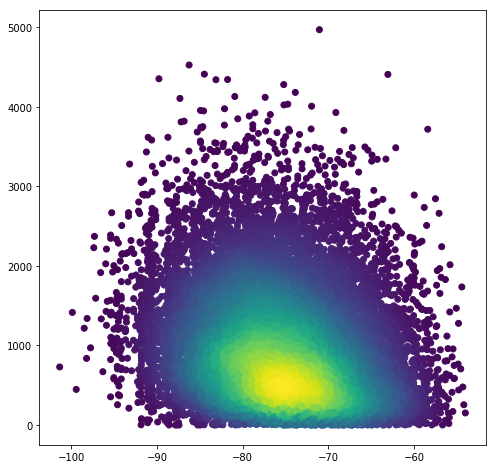

In [459]:
plt.figure(figsize=(8,8))
v1 = era_all['CAPE']
v2 = era_all['tmin']
data, r = density_plot(v2, v1)
plt.scatter(v2,v1, c=data, cmap='viridis')
#plt.plot(np.arange(-100,-50), np.arange(-100,-50)*0, 'k')

(array([4.000e+00, 6.000e+00, 2.000e+01, 3.200e+01, 4.500e+01, 5.000e+01,
        7.000e+01, 8.300e+01, 1.320e+02, 1.470e+02, 2.140e+02, 2.550e+02,
        3.300e+02, 4.760e+02, 7.780e+02, 2.682e+03, 6.764e+03, 5.015e+03,
        1.708e+03, 6.700e+01]),
 array([0.00503412, 0.00564447, 0.00625483, 0.00686518, 0.00747553,
        0.00808589, 0.00869624, 0.0093066 , 0.00991695, 0.01052731,
        0.01113766, 0.01174802, 0.01235837, 0.01296872, 0.01357908,
        0.01418943, 0.01479979, 0.01541014, 0.0160205 , 0.01663085,
        0.01724121]),
 <a list of 20 Patch objects>)

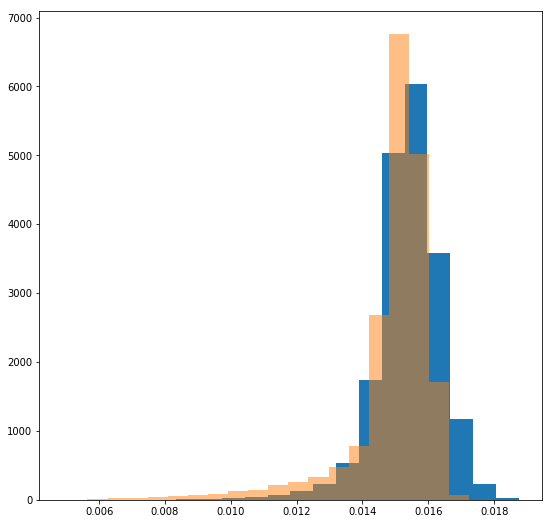

In [289]:
plt.figure(figsize=(9,9))
plt.hist(np.array(era_all['q925_s']), bins=20)
plt.hist(np.array(era_clim['q925_s']), bins=20, alpha=0.5)

In [387]:
def density_plot(v1,v2):
    xy = np.vstack([v1, v2])
    z = gaussian_kde(xy)(xy)
    data = z / (z.max() - z.min())

    r = stats.pearsonr(v1,v2)
    print('pears', stats.pearsonr(v1,v2))
    
    return data, r

pears (-0.10554447902299628, 6.642997708548834e-48)


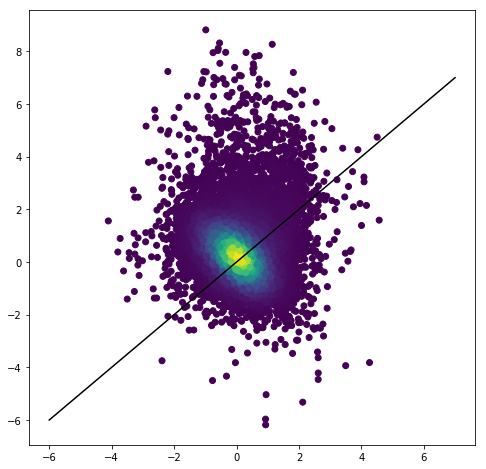

In [291]:
plt.figure(figsize=(8,8))
v1 = (np.array(era_all['q925_s'])-np.array(era_clim['q925_s']))*1000-(np.array(era_all['q925'])-np.array(era_clim['q925']))*1000
v2 = (np.array(era_all['u650'])-np.array(era_clim['u650'])) - (np.array(era_all['u925'])-np.array(era_clim['u925']))
v2 = (np.array(era_all['q925'])-np.array(era_clim['q925']))*1000
data, r = density_plot(v1, v2)
plt.scatter(v1,v2, c=data, cmap='viridis')
plt.plot(np.arange(-6,8), np.arange(-6,8), 'k')

In [292]:
diff = dq_s-dq
print(np.sum(diff>0))
print(np.sum(diff<0))

10328
8550


(array([3.000e+00, 1.000e+01, 1.000e+01, 2.100e+01, 7.000e+01, 2.080e+02,
        5.990e+02, 1.590e+03, 3.666e+03, 5.220e+03, 4.085e+03, 1.998e+03,
        7.620e+02, 3.840e+02, 1.520e+02, 6.600e+01, 1.400e+01, 9.000e+00,
        7.000e+00, 4.000e+00]),
 array([-4.1071102 , -3.67328632, -3.23946243, -2.80563855, -2.37181466,
        -1.93799078, -1.50416689, -1.070343  , -0.63651912, -0.20269523,
         0.23112865,  0.66495254,  1.09877642,  1.53260031,  1.96642419,
         2.40024808,  2.83407196,  3.26789585,  3.70171973,  4.13554362,
         4.56936751]),
 <a list of 20 Patch objects>)

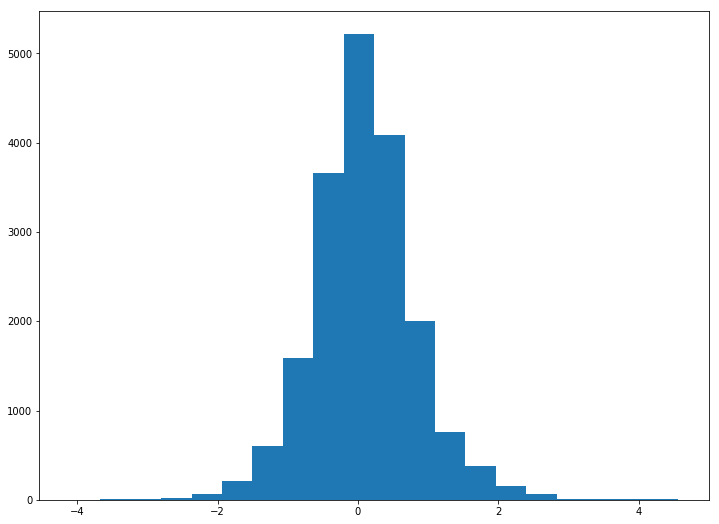

In [293]:
plt.figure(figsize=(12,9))
plt.hist(diff, bins=20)

In [408]:
level = era_all.pop('level')
level = era_clim.pop('level')

In [409]:
era_all_qsum = get_q(era_all['q_col'])
era_all['q_col_sum'] = era_all_qsum['low']
era_all_qsum_storm = get_q(era_all['q_col_s'])
era_all['q_col_sum_s'] = era_all_qsum_storm['low']

In [410]:
era_new = era_all.copy()
dic_months = {}
for ii in range(1,13):
    dic_months[str(ii)] = era_all.copy()
octt = era_all.copy()
marchh = era_all.copy()

In [411]:
for k in era_all.keys():
    print(k)
#     if k == 'dates':
#         continue
    varlist = []
    varo = []
    varm = []
    for ids, ise in enumerate(era_all[k]):
        
#         if k in ['tmean', 'tmin', 't10', 'area', 'area70']:
#             diff = np.array(ise)
#         else:
#             diff = np.array(ise)-np.array((era_clim[k])[ids])
            
        if 'q' not in k:
            diff = np.array(ise)
        else:
            diff = np.array(ise)#-np.array((era_clim[k])[ids])
        
#         if ((era_all['dates'][ids].month <=6) & (era_all['dates'][ids].month >=3)) | \
#         ((era_all['dates'][ids].month >=9) & (era_all['dates'][ids].month <=11)):
        varlist.append(diff)
            
        if era_all['dates'][ids].month == 3:
            varm.append(diff)
        if era_all['dates'][ids].month == 10:
            varo.append(diff)
    era_new[k] = np.array(varlist)          
    octt[k] = np.array(varo)
    marchh[k] = np.array(varm)

lon
u_col
u_col_s
u925
area70
u925_s
q_col_s
q_col_sum
u650_s
tmean
tcwv_s
u650
v_col_s
q_col
q_col_sum_s
r_col_s
lat
q925
t10
q700_s
tmin
CAPE
v_col
dates
q700
area
tcwv
q925_s
CAPE_s
r_col


In [412]:
qmsort = np.argsort(marchh['q925'])
qm = marchh['q925'][qmsort]

In [413]:
marchh['u_col'][10]

array([  9.116018 ,   5.3214493,   6.497487 ,   2.2076702,   0.5084858,
        -0.9702797,  -5.0452576,  -8.982122 ,  -7.150406 , -10.400902 ,
       -13.313789 , -12.997112 ,  -3.3962936,   0.9074726,   1.6370907,
         1.6552258,   1.7765961,   1.6524353,   1.1041775], dtype=float32)

In [488]:
def sort_vars(dic):
    q925 = np.array(dic['q925'])
    q925s = np.array(dic['q925_s'])
    
    udic = get_col(dic['u_col'])
    vdic = get_col(dic['v_col'])
    
    ushear = (np.array(udic['high'])-np.array(udic['low']))
    vshear = (np.array(vdic['high'])-np.array(vdic['low']))
    shearss = u_met.u_v_to_ws_wd(ushear, vshear)
    shears =   shearss[0] #np.array(dic['u650']) - np.array(dic['u925']) #shearss[0]  #
    
    
    q925 = (q925) #np.array(qdics['high'])-np.array(qdic['high'])#
    q925diff = q925s - q925
    print(np.sum(q925diff>0))
    print(np.sum(q925diff<0))
    sort = np.argsort(q925)
    q = q925[sort]*1000
   
    shear = shears[sort]
    tmin = np.array(dic['tmin'])[sort]
    linsp = np.linspace(0,len(q)-1,15)

    inds = np.round(linsp).astype(int)
    #ipdb.set_trace()
    f=plt.figure(figsize=(13,9))
    ax = f.add_subplot(311)
    plt.plot(q)
    #plt.ylim(8,18)
    ax = f.add_subplot(312)
    plt.plot(shear,'r')
    ax = f.add_subplot(313)
    plt.plot(tmin,'k')
    
    plt.show()
    
    qmean = []
    corr = []
    qcorr = []
    
    for start,end in enumerate(inds[2::]):  #
        
        #ipdb.set_trace()
        print(inds[start],end)
        qmean.append(np.median(q[inds[start]:end]))
        corr.append(stats.pearsonr(shear[inds[start]:end],tmin[inds[start]:end])[0])    
        qcorr.append(stats.pearsonr(shear[inds[start]:end],q[inds[start]:end])[0])  

#         ttslope, intercept, rc, p, std_err = linregress(shear[inds[start]:end],tmin[inds[start]:end])    
#         ccslope, intercept, rt, p, std_err = linregress(q[inds[start]:end], shear[inds[start]:end])
#         corr.append(ttslope) 
#         qcorr.append(ccslope) 
    return qmean, corr, qcorr

986
1168


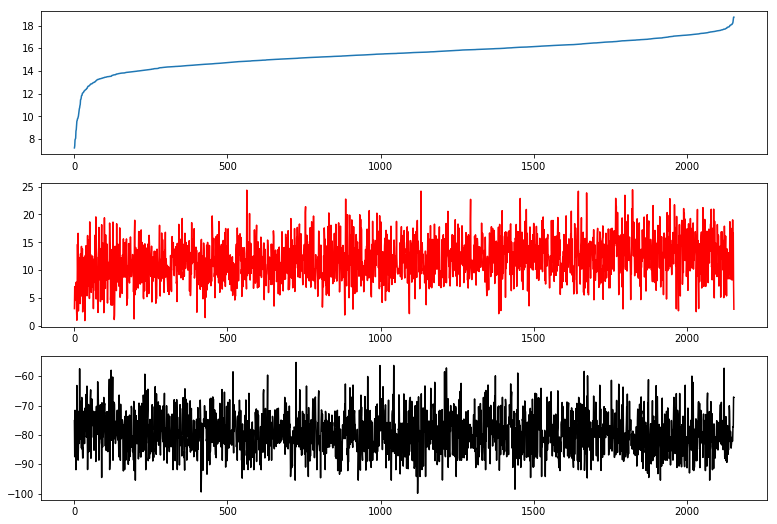

0 308
154 462
308 615
462 769
615 923
769 1077
923 1231
1077 1385
1231 1539
1385 1692
1539 1846
1692 2000
1846 2154


In [489]:
qmean_march, corr_march, qcorr_march = sort_vars(marchh)

1405
1454


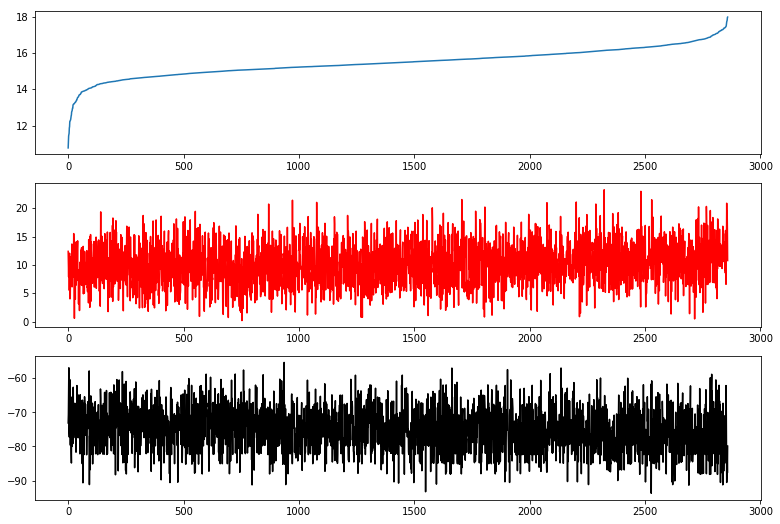

0 408
204 612
408 817
612 1021
817 1225
1021 1429
1225 1633
1429 1837
1633 2041
1837 2246
2041 2450
2246 2654
2450 2858


In [490]:
qmean_oct, corr_oct, qcorr_oct = sort_vars(octt)

9454
9419


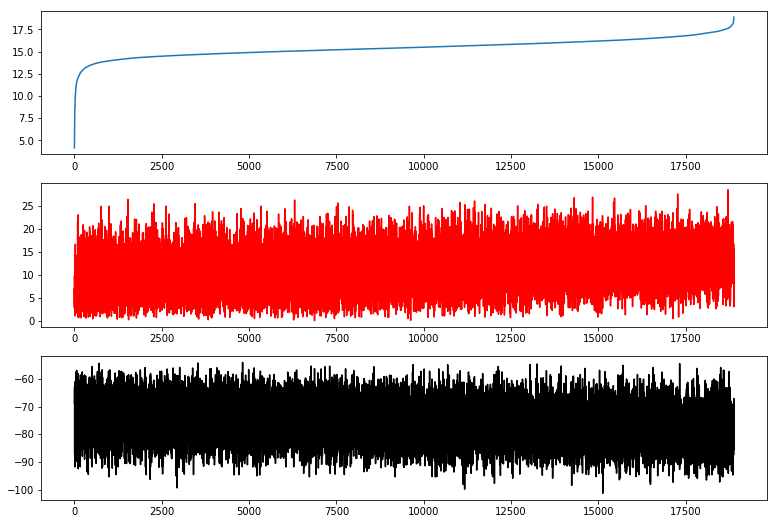

0 2697
1348 4045
2697 5393
4045 6742
5393 8090
6742 9438
8090 10787
9438 12135
10787 13484
12135 14832
13484 16180
14832 17529
16180 18877


In [491]:
qmean_all, corr_all, qcorr_all = sort_vars(era_new)

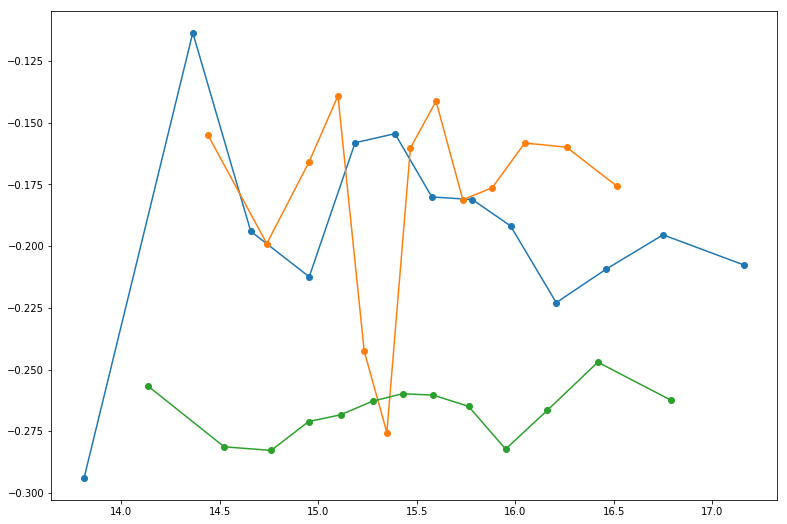

In [492]:
plt.figure(figsize=(13,9))
plt.plot(np.array(qmean_march),corr_march, '-o')
plt.plot(np.array(qmean_oct),corr_oct, '-o')
plt.plot(np.array(qmean_all),corr_all, '-o')

In [493]:
def sort_vars(dic):
    q925 = np.array(dic['q925'])
    q925s = np.array(dic['q925_s'])
    
    udic = get_col(dic['u_col'])
    vdic = get_col(dic['v_col'])
    
    ushear = (np.array(udic['high'])-np.array(udic['low']))
    vshear = (np.array(vdic['high'])-np.array(vdic['low']))

    shearss = u_met.u_v_to_ws_wd(ushear, vshear)
    shears =shearss[0]#np.array(dic['u650']) - np.array(dic['u925']) #shearss[0]
    
    
    q925diff = q925s - q925 #np.array(qdics['high'])-np.array(qdic['high'])#
    print(np.sum(q925diff>0))
    print(np.sum(q925diff<0))
    sort = np.argsort(shears)
    q = q925diff[sort]*1000
    qq  = q925*1000
    shear = shears[sort]
    tmin = np.array(dic['tmin'])[sort]
    linsp = np.linspace(0,len(shears)-1,15)
    
    inds = np.round(linsp).astype(int)
    #ipdb.set_trace()
    f=plt.figure(figsize=(13,9))
    ax = f.add_subplot(311)
    plt.plot(q925diff)
    #plt.ylim(8,18)
    ax = f.add_subplot(312)
    plt.plot(shear,'r')
    ax = f.add_subplot(313)
    plt.plot(tmin,'k')
    
    plt.show()
    
    qmean = []
    corr = []
    qcorr = []
    
    for start,end in enumerate(inds[2::]):  #
        #ipdb.set_trace()
        qmean.append(np.median(shear[inds[start]:end]))
        
        corr.append(stats.pearsonr(shear[inds[start]:end],tmin[inds[start]:end])[0])    
        qcorr.append(np.sum(q[inds[start]:end]>0.01) / np.sum(np.isfinite(q[inds[start]:end])) *100)  

#         ttslope, intercept, rc, p, std_err = linregress(shear[start:end],tmin[start:end])    
#         ccslope, intercept, rt, p, std_err = linregress(q[start:end], shear[start:end])
#         corr.append(ttslope) 
#         qcorr.append(ccslope) 
    return qmean, corr, qcorr

986
1168


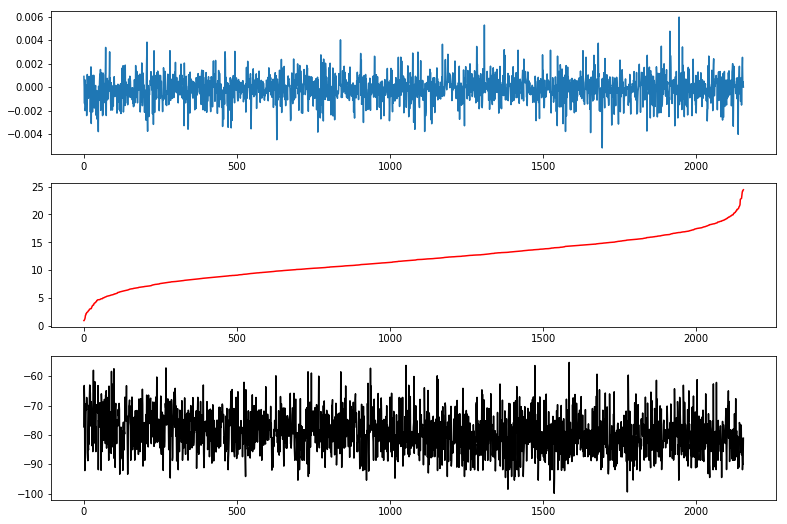

In [478]:
qmean_march, corr_march, qcorr_march = sort_vars(marchh)

1405
1454


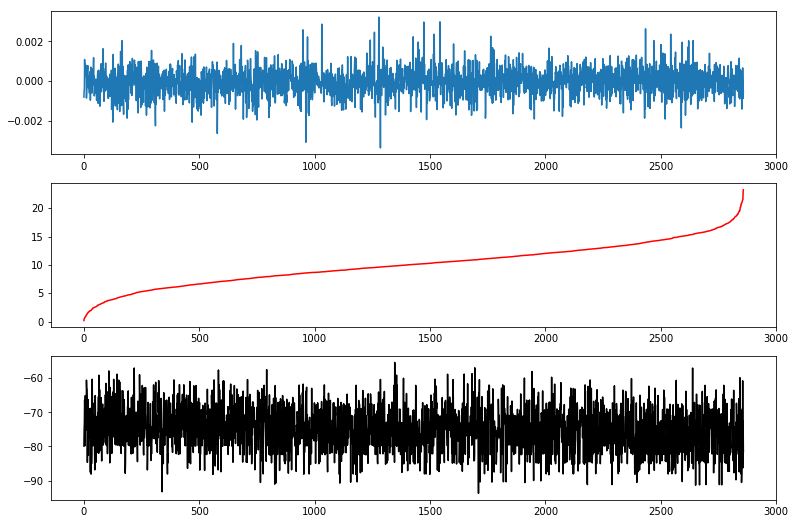

In [479]:
qmean_oct, corr_oct, qcorr_oct = sort_vars(octt)

9454
9419


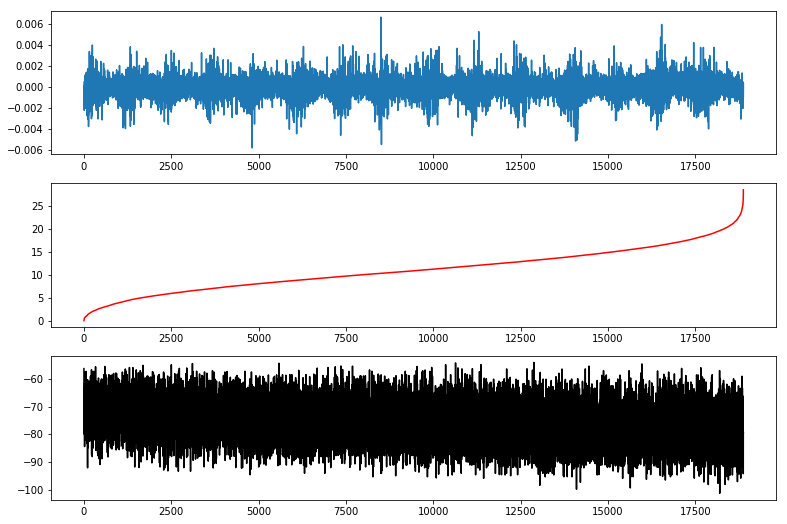

In [480]:
qmean_all, corr_all, qcorr_all = sort_vars(era_new)

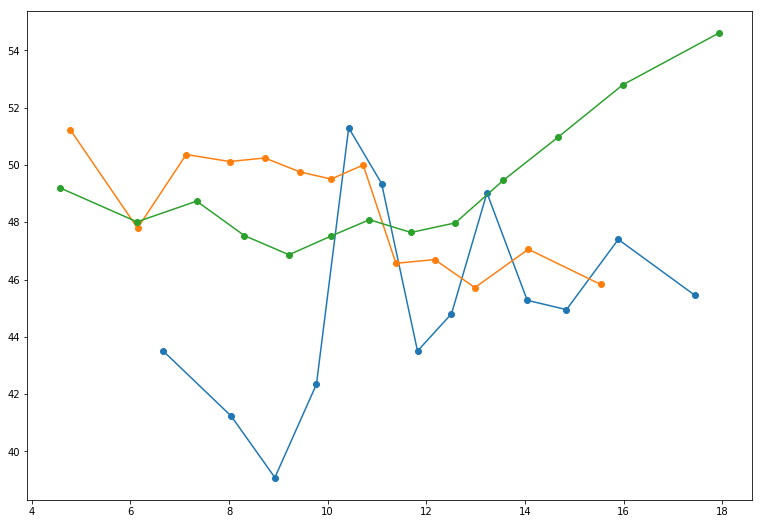

In [481]:
plt.figure(figsize=(13,9))
plt.plot(np.array(qmean_march),qcorr_march, '-o')
plt.plot(np.array(qmean_oct),qcorr_oct, '-o')
plt.plot(np.array(qmean_all),qcorr_all, '-o')